<a href="https://colab.research.google.com/github/akshar99/AI-Trading/blob/main/lasso_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso 
from sklearn.metrics import mean_absolute_error ,accuracy_score


df = pd.read_csv('/content/drive/MyDrive/python/dfn.csv')
df=df.fillna(df.mean())
df= df.drop(columns='Marker')
df= df.drop(columns='Unnamed: 0')
nd = df['Close'].to_frame()
for lag in [1,2,3,4,5,6,7,8,9,10]:
  shift = lag
  shifted = df.shift(shift)
  shifted.columns = [str.format('%s_shifted_by_%d' % (column ,shift)) for column in shifted.columns]
  nd = pd.concat((nd,shifted) , axis=1)

df_ = nd
df_ = df_.fillna(df_.mean())
df_ = df_.select_dtypes(include=np.number)
df_ = df_.fillna(df.mean())

forward_lag = 5
df_['target'] = df_['Close'].shift(-forward_lag)

x = df_.drop('target' , axis=1)
y=df_['target']
X_train , X_test , y_train ,y_test = train_test_split(x,y , test_size=0.3 , random_state=42)
correlations = np.abs(X_train.corrwith(y_train))

features = list(correlations.sort_values(ascending=False)[0:50].index)

X_train=X_train[features]
X_train = X_train.fillna(X_train.mean())
X_test = X_test[features]
X_test = X_test.fillna(X_test.mean())

In [ ]:
df.shape

(2964, 24)

In [ ]:
y_test[np.isnan(y_test)] = np.nanmean(y_test)

In [ ]:
y_train[np.isnan(y_train)] = np.nanmean(y_train)

In [ ]:
df.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Percentage Change     0
Pivot                 0
R1                    0
R2                    0
S1                    0
S2                    0
Moving Average 5      0
Moving Average 10     0
Moving Average 20     0
Moving Average 50     0
Moving Average 200    0
TR                    0
ATR                   0
Upper Basic           0
Lower Basic           0
Upper Band            0
Lower Band            0
SuperTrend            0
RSI                   0
dtype: int64

In [ ]:
lso = Lasso(alpha=0.001 , max_iter=2000)

In [ ]:
y_train = y_train.fillna(y_train.mean())

In [ ]:
y_train.isnull().unique().sum()

0

In [ ]:
lso.fit(X_train ,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185661979.49882528, tolerance: 1302951.9759815491
  positive)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=2000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_pred = lso.predict(X_test)

In [ ]:
y_pred2 = pd.DataFrame(y_pred)

In [ ]:
y_pred2 = y_pred2.fillna(y_pred2.mean)


Text(0.5, 1.0, 'Scatter on Line of Best Fit')

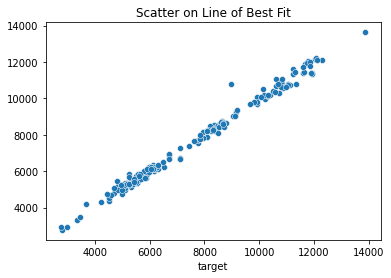

In [ ]:
sns.scatterplot(x=y_test[:200] , y=y_pred[:200])
plt.title('Scatter on Line of Best Fit')

In [ ]:
import math

In [ ]:
RMSE = math.sqrt(mean_absolute_error(y_test , y_pred))

In [ ]:
y_test.isnull().sum()

2

In [ ]:
RMSE

14.778060862495872

In [ ]:
mae = mean_absolute_error(y_test , y_pred)
mae

218.39108285563225

In [ ]:
(mae/7762)*100

2.8135929252207195

In [ ]:
y_pred_train = lso.predict(X_train)

In [ ]:
mean_absolute_error(y_train , y_pred_train)

207.7027613619715

In [ ]:
RMSE_train = math.sqrt(mean_absolute_error(y_train , y_pred_train))

In [ ]:
RMSE_train

14.411896522039406

In [ ]:
y_test.shape

(890,)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error(y_test , y_pred)

2.9810307121476405

In [ ]:
mean_absolute_percentage_error(y_train , y_pred_train)

2.948126330284153

In [ ]:
l=[]
for i in range(200):
  l.append(i)

Text(0.5, 1.0, 'Comparison of Real & Predicted')

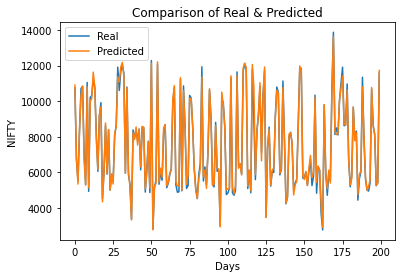

In [ ]:
sns.lineplot(x=l , y=y_test[:200] , label='Real')
sns.lineplot(x=l , y=y_pred[:200] , label='Predicted')
plt.xlabel('Days')
plt.ylabel('NIFTY')
plt.title('Comparison of Real & Predicted')

In [ ]:
y_test[:100]

2495    10746.049810
1313     6696.399902
767      5531.950195
1461     8340.700195
2834    10705.750000
            ...     
51       2978.149902
2419    10124.900390
2134     9917.900391
1455     8555.900391
678      4751.299805
Name: target, Length: 100, dtype: float64